# Bobcat Population Analysis

In [211]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

### Ex-situ Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   154.711636     5
6   136.761632     6
7   120.824721     7
8   106.905764     8
9    94.615734     9
10   83.736099    10
11   74.112109    11
12   65.597032    12
13   58.068548    13
14   51.418291    14
15   45.539210    15
16   40.337343    16
17   35.727043    17
18   31.640480    18
19   28.020880    19
20   24.815916    20
21   21.977539    21
22   19.463702    22
23   17.237403    23
24   15.265763    24
25   13.519638    25
26   11.973233    26
27   10.603708    27
28    9.390834    28
29    8.316691    29
30    7.365413    30
31    6.522944    31
32    5.776838    32


[Text(0.5, 1.0, 'Wild Bobcat Population')]

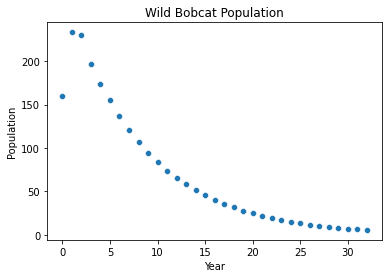

In [212]:
default_leslie_matrix = np.array([[0.32, 0.32, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01],
                         [0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Population' : nth_population,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_ex_situ = growth()

sns.scatterplot(data = data_nth_population_ex_situ, x = "Year", y = "Population").set(title = "Wild Bobcat Population")

### In-situ Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      659.378462     5
6      816.476326     6
7     1011.801542     7
8     1254.810158     8
9     1556.937354     9
10    1932.309667    10
11    2398.526699    11
12    2977.476937    12
13    3696.349631    13
14    4588.910176    14
15    5697.086946    15
16    7072.962384    16
17    8780.820087    17
18   10900.820052    18
19   13532.641624    19
20   16799.935634    20
21   20856.107525    21
22   25891.603462    22
23   32142.871022    23
24   39903.448538    24
25   49537.743797    25
26   61498.146761    26
27   76346.272961    27
28   94779.334716    28
29  117662.879458    29
30  146071.432573    30
31  181338.953086    31
32  225121.471343    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

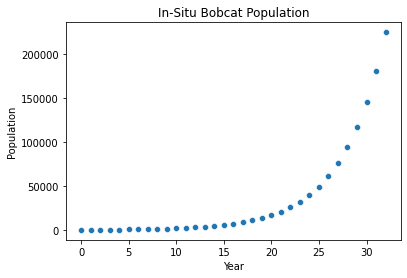

In [213]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_in_situ = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

## Extended Model

In [214]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.2

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   119.968624     5
6   105.819305     6
7    93.472394     7
8    82.740819     8
9    73.234582     9
10   50.166036    10
11   44.402299    11
12   39.301632    12
13   34.794220    13
14   30.814753    14
15   21.131685    15
16   18.719463    16
17   16.577997    17
18   14.680421    18
19   13.001139    19
20    8.914201    20
21    7.894486    21
22    6.991447    22
23    6.191774    23
24    5.483554    24
25    3.759619    25
26    3.329585    26
27    2.948740    27
28    2.611458    28
29    2.312755    29
30    1.585667    30
31    1.404295    31
32    1.243670    32


[Text(0.5, 1.0, 'Bobcat Population with Catastrophes')]

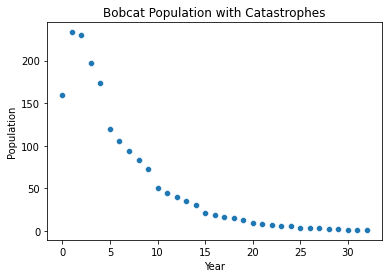

In [215]:
def growth_extended_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population)
        else:
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Bobcat Population with Catastrophes")

### In-situ Catastrophe Model

      Population  Year
0     160.000000     0
1     283.400000     1
2     364.551000     2
3     436.625020     3
4     533.537755     4
5     552.670911     5
6     684.600633     6
7     848.506276     7
8    1052.449850     8
9    1305.975322     9
10   1359.727132    10
11   1687.880327    11
12   2095.358644    12
13   2601.299925    13
14   3229.469401    14
15   3363.482980    15
16   4175.808641    16
17   5183.981809    17
18   6435.506790    18
19   7989.264304    19
20   8320.349644    20
21  10329.216078    21
22  12823.098774    22
23  15919.108345    23
24  19762.621007    24
25  20581.588272    25
26  25550.811571    26
27  31719.805491    27
28  39378.242825    28
29  48885.735032    29
30  50911.571255    30
31  63203.672643    31
32  78463.581541    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population with Catastrophes')]

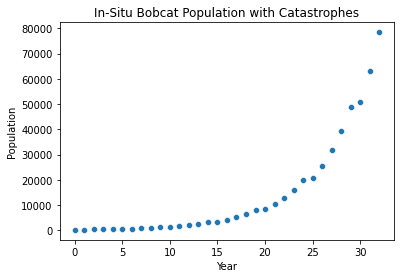

In [216]:
data_nth_population_extended_in_situ = growth_extended_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population with Catastrophes")

### Ex-situ Migration Model

    Population  Year
0   160.000000     0
1   254.200000     1
2   271.150000     2
3   257.196280     3
4   251.121227     4
5   246.876809     5
6   242.021526     6
7   237.683221     7
8   234.027449     8
9   230.821473     9
10  227.983046    10
11  225.479303    11
12  223.272198    12
13  221.332489    13
14  219.633422    14
15  218.138947    15
16  216.819332    16
17  215.647059    17
18  214.605467    18
19  213.682595    19
20  212.865869    20
21  212.142555    21
22  211.501860    22
23  210.934449    23
24  210.431950    24
25  209.986921    25
26  209.592791    26
27  209.243742    27
28  208.934619    28
29  208.660855    29
30  208.418407    30
31  208.203691    31
32  208.013535    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Migrations')]

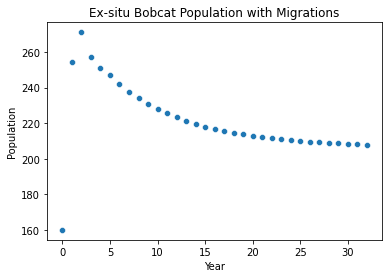

In [217]:
def growth_extended_migration(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population) + np.array([7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
        current_population = leslie_matrix.dot(current_population) + np.array([7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended_migration()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Migrations")

### In-situ Migration Model

       Population  Year
0      160.000000     0
1      304.400000     1
2      415.091000     2
3      526.043020     3
4      671.056059     4
5      856.353356     5
6     1087.260405     6
7     1374.249104     7
8     1731.062975     8
9     2174.478449     9
10    2725.261763    10
11    3409.254613    11
12    4258.577128    12
13    5313.121333    13
14    6622.423441    14
15    8247.933656    15
16   10266.007064    16
17   12771.113791    17
18   15880.864827    18
19   19741.408457    19
20   24534.085760    20
21   30483.928657    21
22   37870.304122    22
23   47040.048361    23
24   58423.740301    24
25   72555.915589    25
26   90100.167809    26
27  111880.309144    27
28  138919.053364    28
29  172486.038487    29
30  214157.444191    30
31  265890.003291    31
32  330112.882675    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Migrations')]

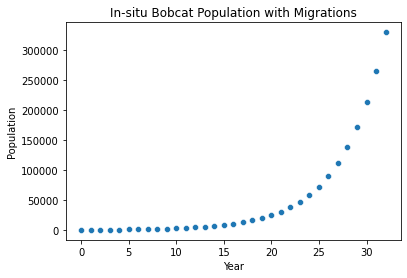

In [218]:
data_nth_population_extended_ex_situ = growth_extended_migration(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Migrations")

## Stochastic Model

In [219]:
# Seed and success values
rd.seed(0)
default_success_rate_catastrophes = 0.7 # 70% of the times, a catastrophe is successful

### Ex-situ Catastrophe Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   119.968624     5
6   105.819305     6
7    93.472394     7
8    82.740819     8
9    73.234582     9
10   64.812952    10
11   57.364890    11
12   50.774610    12
13   44.949142    13
14   39.804581    14
15   27.294636    15
16   24.178390    16
17   21.413675    17
18   18.963156    18
19   16.793770    19
20   11.514429    20
21   10.197371    21
22    9.030921    22
23    7.997959    23
24    7.083145    24
25    4.856330    25
26    4.300851    26
27    3.808911    27
28    3.373240    28
29    2.987402    29
30    2.048218    30
31    1.813939    31
32    1.606457    32


[Text(0.5, 1.0, 'Ex-situ Bobcat Population with Stochastic Catastrophes')]

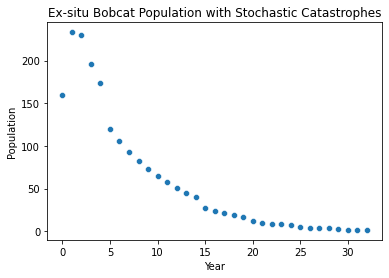

In [220]:
def growth_stochastic_catastrophe(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix, success_rate = default_success_rate_catastrophes):
    nth_population_stochastic = np.zeros(number_of_years+1)
    nth_population_stochastic[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            current_success = rd.random()
            if (current_success < success_rate):
                nth_population_stochastic[i] = np.sum(leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population))
                current_population = leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population)
            else:
                nth_population_stochastic[i] = np.sum(leslie_matrix.dot(current_population))
                current_population = leslie_matrix.dot(current_population)
        else:
            nth_population_stochastic[i] = np.sum(leslie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population)

    df = pd.DataFrame({
        'Population' : nth_population_stochastic,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ_stochastic = growth_stochastic_catastrophe()

sns.scatterplot(data = data_nth_population_extended_ex_situ_stochastic, x = "Year", y = "Population").set(title = "Ex-situ Bobcat Population with Stochastic Catastrophes")

### In-situ Catastrophe Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      552.670911     5
6      684.600633     6
7      848.506276     7
8     1052.449850     8
9     1305.975322     9
10    1620.922196    10
11    2012.064766    11
12    2497.771597    12
13    3100.854244    13
14    3849.640250    14
15    4779.304910    15
16    5933.544995    16
17    7366.227610    17
18    9144.656035    18
19   11352.477614    19
20   11822.911786    20
21   14677.438936    21
22   18221.157877    22
23   22620.473938    23
24   28081.964267    24
25   34862.079223    25
26   43279.187184    26
27   53728.524009    27
28   66700.751402    28
29   82804.996490    29
30   86236.454881    30
31  107057.404399    31
32  132905.368364    32


[Text(0.5, 1.0, 'In-situ Bobcat Population with Stochastic Catastrophes')]

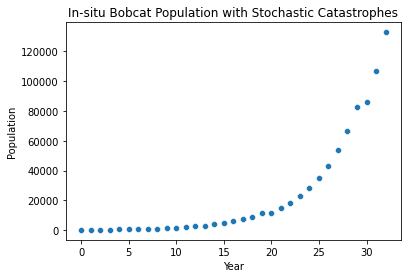

In [221]:
data_nth_population_extended_in_situ_stochastic = growth_stochastic_catastrophe(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ_stochastic, x = "Year", y = "Population").set(title = "In-situ Bobcat Population with Stochastic Catastrophes")

### 